In [1]:
version_num = "10"

In [2]:
import pretty_midi
import numpy as np
# For plotting
import mir_eval.display
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline 
# For putting audio in the notebook
import IPython.display
import pypianoroll
from music_theory_utils import make_dicts,inversion
from gen_music import *
import datetime
from config import *

### ここから★

In [3]:
multitrack   = pypianoroll.Multitrack(resolution=quarter_reso,tempo=tempos)

### make chord track

In [4]:
track1 = pypianoroll.StandardTrack(name="piano",program=0,is_drum=False)
multitrack.tracks.append(track1)

In [5]:
bar_backing_rhythm_list = []
bar_backing_chord_list = []
bar_backing_pianoroll_list = []

bar_backing_rhythm_list.append( make_backing_rhythm() )
bar_backing_chord_list.append( make_backing_chord() )

pianoroll = chord2pianorll(bar_backing_rhythm_list[0],bar_backing_chord_list[0])
bar_backing_pianoroll_list.append( pianoroll )

In [6]:
backing_pianorll = np.array(bar_backing_pianoroll_list)
backing_pianorll = backing_pianorll.reshape(-1,pitch_reso)

In [12]:
track1.pianoroll = backing_pianorll

[<AxesSubplot:xlabel='time (beat)', ylabel='piano\n\npitch'>]

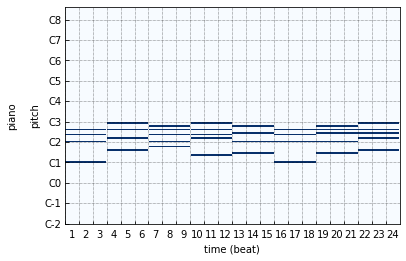

In [13]:
#plt.figure()
multitrack.plot()

### モチーフ反復

In [14]:
#1小節目生成
bar_rhythm_list = []
bar_pitch_list = []
bar_pianoroll_list = []
bar_rhythm_list.append(make_motief_rhythm())
bar_pitch_list.append(make_motief_pitch(bar_rhythm_list[0]))
bar_pianoroll_list.append(events2pianoroll(bar_rhythm_list[0], bar_pitch_list[0]))

for i in [1, 2]:
    if np.random.choice([0, 1], p=[0.5, 0.5]):
        print("コピー")
        # モチーフ反復
        bar_rhythm_list.append(bar_rhythm_list[0])
        bar_pitch_list.append(bar_pitch_list[0])
        bar_pianoroll_list.append(bar_pianoroll_list[0])
    else:
        print("振りなおし")
        # ピッチを振りなおす
        bar_rhythm_list.append(bar_rhythm_list[0])
        bar_pitch_list.append(make_motief_pitch(bar_rhythm_list[0]))
        bar_pianoroll_list.append(events2pianoroll(bar_rhythm_list[i], bar_pitch_list[i]))


コピー
コピー


In [15]:
verse_pre = np.array(bar_pianoroll_list)

In [16]:
verse_break_rhythm, verse_break_pitch, verse_break = make_motief()
bar_pitch_list.append(verse_break_pitch)
bar_rhythm_list.append(verse_break_rhythm)
verse = np.concatenate([verse_pre, verse_break.reshape(1, bar_reso, pitch_reso)], axis = 0).reshape(4*bar_reso, pitch_reso)

In [17]:
pianoroll = np.tile(verse,(2,1))
track2 = pypianoroll.StandardTrack(name="piano",program=12,is_drum=False)

In [18]:
multitrack.tracks.append(track2)
track2.pianoroll = pianoroll

[<AxesSubplot:xlabel='time (beat)', ylabel='piano\n\npitch'>,
 <AxesSubplot:xlabel='time (beat)', ylabel='piano\n\npitch'>]

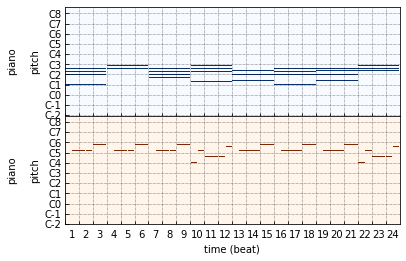

In [19]:
multitrack.plot()

In [20]:
pm = multitrack.to_pretty_midi()

In [21]:
dt_now = datetime.datetime.now()
pm.write(f'{version_num}_{dt_now.year:04d}{dt_now.month:02d}{dt_now.day:02d}_{dt_now.hour:02d}{dt_now.minute:02d}{dt_now.second:02d}.midi')

### 隔離

In [22]:
IPython.display.Audio(pm.fluidsynth(fs=16000), rate=16000)